In [439]:
#first import libraries

import numpy as np
# Data Processing
import pandas as pd
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [440]:
#Reading Data 
df = pd.read_csv('hotel_bookings.csv')

In [441]:
#Understanding Data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [442]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [443]:
df.shape

(119390, 32)

# Cleaning the data 

In [444]:
#drop duplicates rows
df = df.drop_duplicates()
df.shape

(87396, 32)

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [446]:
# remove rows with null value if any
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [447]:
df = df.dropna(axis=0)
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [448]:
#convert datatypes of children and agent from float to integer .
df.children= df.children.astype(int)
df.children.unique()

array([0, 1, 2])

In [449]:
df.agent=df.agent.astype(int)
df.agent.unique()

array([240, 185, 334, 328, 326, 324, 405, 223,   5, 196, 184, 250, 139,
       146, 314, 242, 143,  40,   9,  14,  45,  85, 290,  27,   7, 159,
       195, 444])

In [450]:
#Drop the rows with column 'adult=0'
df = df[df['adults']!=0]


In [451]:
#drop unnesscery columns
label = ['company','days_in_waiting_list', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'days_in_waiting_list']
df.drop(labels=label,axis=1,inplace=True)

In [452]:
#replace null values with 0 in agent feature.
df['agent'].fillna(value=0,inplace=True)
df = df.dropna(axis=0) # To remove rows with null value
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
deposit_type                      0
agent                             0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
dtype: int64

In [453]:
#Fill in null value in adr with mean.
df['adr'] = df['adr'].fillna(value = df['adr'].mean())

In [454]:
#Replace NULL with "unknown" in column country.
where = df["country"].fillna({"country": "unknown"}).reset_index()
where = where.groupby("country").aggregate({"country": "count"})
where = where.rename(columns={'country': 'count', 'index': 'country'}).reset_index().sort_values('count', ascending=False)

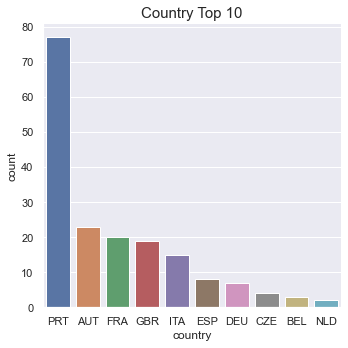

In [455]:
#show no more " unknown" in column country.
sns.set(style='darkgrid')
sns.catplot(x="country", y="count", kind="bar", data=where.head(10))
plt.title(label="Country Top 10", loc="center", fontsize=15)
plt.tight_layout()

plt.show()

# Exploring the data 

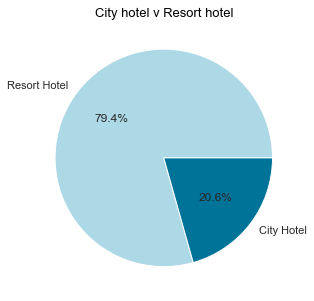

In [456]:
# what is the hotel types and which one is more demand?

# Show the type of hotel
df.hotel.unique()

df['hotel'].value_counts()

#visulize it
labels = df.hotel.value_counts().index
sizes = df.hotel.value_counts()
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = ['#ADD8E6','#007399'])
plt.title('City hotel v Resort hotel',color = 'black',fontsize = 13);

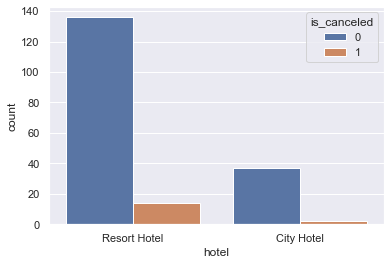

In [457]:
# Which type of hotel has the highest number of cancellations?
sns.countplot(data=df, x = 'hotel', hue='is_canceled')
plt.show()

In [458]:
# What is the percent of repeat customers?
print('Percentage of repeated customers =',len(df[df['is_repeated_guest']==1])*100/len(df),'%')

Percentage of repeated customers = 7.936507936507937 %


In [459]:
# what is the busy month ?
busy_monts = df['arrival_date_month'].value_counts().reset_index()
busy_monts.columns=['month','no of guests']
busy_monts

,month,no of guests
0,November,111
1,May,18
2,August,13
3,October,10
4,January,10
5,December,5
6,March,5
7,July,5
8,September,5
9,June,4


In [460]:
# How many guest from each country ?
df_country = df['country'].value_counts().reset_index()
df_country.columns = ['Country','No.of Guests']
df_country

,Country,No.of Guests
0,PRT,77
1,AUT,23
2,FRA,20
3,GBR,19
4,ITA,15
5,ESP,8
6,DEU,7
7,CZE,4
8,BEL,3
9,MEX,2


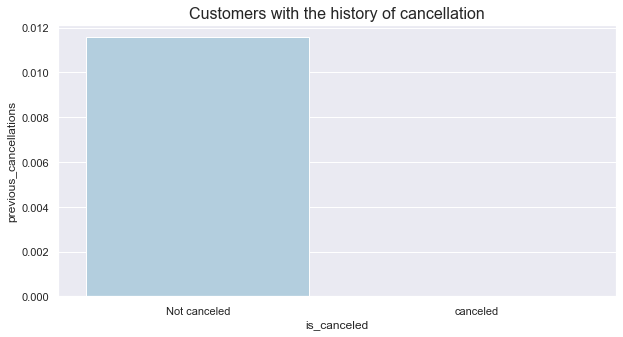

In [461]:
# How many Customers with the history of cancellation?
ngroup = df.groupby('is_canceled', as_index= False)[['previous_cancellations']].mean()
plt.figure(figsize=(10,5))
plt.title("Customers with the history of cancellation",fontsize=16)
history_of_cancellation=sns.barplot(data=ngroup, x=ngroup['is_canceled'], y=ngroup['previous_cancellations'], palette='Blues')
history_of_cancellation.set_xticklabels(['Not canceled','canceled']);

# data prepration for modeling

In [462]:
# its better to remove 'country' culmen after i finish exploring 
df.drop('country',axis=1,inplace=True)

In [463]:
# convert the name of month to number 
d = {'January':1, 'February':2, 'March':3, 'April':4,'May':5,'June':6,'July':7,
    'August':8,'September':9,'October':10,'November':11,'December':12}
df.arrival_date_month = df.arrival_date_month.map(d)

In [464]:
# Making tow dataframes with categorical(cat_df) and numerical data ( num_df) seperately for easy manipulation

cat_label=['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

cat_df = df[cat_label]
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
2392,Resort Hotel,BB,Online TA,TA/TO,E,No Deposit,Transient,2015-10-13
2697,Resort Hotel,BB,Corporate,Corporate,E,No Deposit,Transient-Party,2015-11-17
2867,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015-11-06
2877,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015-11-15
2878,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015-11-16


In [465]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

cat_df

C:\Users\MSABA1~1.SHE\AppData\Local\Temp/ipykernel_3528/4181769735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
C:\Users\MSABA1~1.SHE\AppData\Local\Temp/ipykernel_3528/4181769735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['year'] = cat_df['reservation_status_date'].dt.year
C:\Users\MSABA1~1.SHE\AppData\Local\Temp/ipykernel_3528/4181769735.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
2392,Resort Hotel,BB,Online TA,TA/TO,E,No Deposit,Transient,2015-10-13,2015,10,13
2697,Resort Hotel,BB,Corporate,Corporate,E,No Deposit,Transient-Party,2015-11-17,2015,11,17
2867,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015-11-06,2015,11,6
2877,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015-11-15,2015,11,15
2878,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015-11-16,2015,11,16
...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient-Party,2017-05-25,2017,5,25
113046,City Hotel,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017-06-02,2017,6,2
113082,City Hotel,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017-06-02,2017,6,2
113627,City Hotel,BB,Direct,Direct,D,No Deposit,Transient,2017-06-10,2017,6,10


In [466]:
cat_df.drop(['reservation_status_date'] , axis = 1, inplace = True)

cat_df

C:\Users\Ms. Shekha\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
2392,Resort Hotel,BB,Online TA,TA/TO,E,No Deposit,Transient,2015,10,13
2697,Resort Hotel,BB,Corporate,Corporate,E,No Deposit,Transient-Party,2015,11,17
2867,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015,11,6
2877,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015,11,15
2878,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015,11,16
...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient-Party,2017,5,25
113046,City Hotel,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017,6,2
113082,City Hotel,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017,6,2
113627,City Hotel,BB,Direct,Direct,D,No Deposit,Transient,2017,6,10


In [467]:
#  Converting Features

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})
cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

cat_df.head()

C:\Users\MSABA1~1.SHE\AppData\Local\Temp/ipykernel_3528/4126560316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
C:\Users\MSABA1~1.SHE\AppData\Local\Temp/ipykernel_3528/4126560316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
C:\Users\MSABA1~1.SHE\AppData\Local\Temp/ipykernel_3528/4126560316.py:7: SettingWithCopyWarning: 
A value

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
2392,0,0,2,2,3,0,0,0,10,13
2697,0,0,1,1,3,0,2,0,11,17
2867,0,0,1,1,1,0,2,0,11,6
2877,0,0,1,1,1,0,2,0,11,15
2878,0,0,1,1,1,0,2,0,11,16


In [468]:
num_df = df.drop(columns = cat_label, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
2392,6,10,42,11,2,0,2,0,0,0,0,0,240,82.0,1,1
2697,24,10,44,26,7,15,1,0,0,0,0,0,185,52.2,0,0
2867,24,11,45,3,0,3,2,0,0,0,0,0,334,48.0,0,0
2877,24,11,45,3,2,10,1,0,0,0,0,0,328,40.0,0,0
2878,24,11,45,3,3,10,2,0,0,0,0,0,326,48.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,13,5,21,24,0,1,2,0,0,0,0,0,9,150.0,0,1
113046,13,5,22,29,1,3,1,0,0,0,0,0,290,95.0,0,0
113082,13,5,22,29,1,3,2,0,0,0,0,0,290,110.0,0,0
113627,210,6,23,9,0,1,2,0,0,0,0,0,14,135.0,0,0


# find out the correlated value in according to the Target

In [469]:
# find out the factors are most important in canclation by find out the correlated value in according to "is_canceled" 

In [470]:
100 * df.corr()['is_canceled'].sort_values()


total_of_special_requests         -11.736458
stays_in_weekend_nights           -11.612525
required_car_parking_spaces       -10.166917
stays_in_week_nights               -9.642043
adr                                -5.561143
agent                              -4.879761
adults                             -2.795526
previous_cancellations             -2.217982
is_repeated_guest                  -1.897435
previous_bookings_not_canceled     -1.761768
lead_time                          -1.280747
arrival_date_day_of_month          -0.479682
arrival_date_week_number            0.015900
arrival_date_month                  0.042383
children                            2.469682
is_canceled                       100.000000
babies                                   NaN
Name: is_canceled, dtype: float64

<AxesSubplot:>

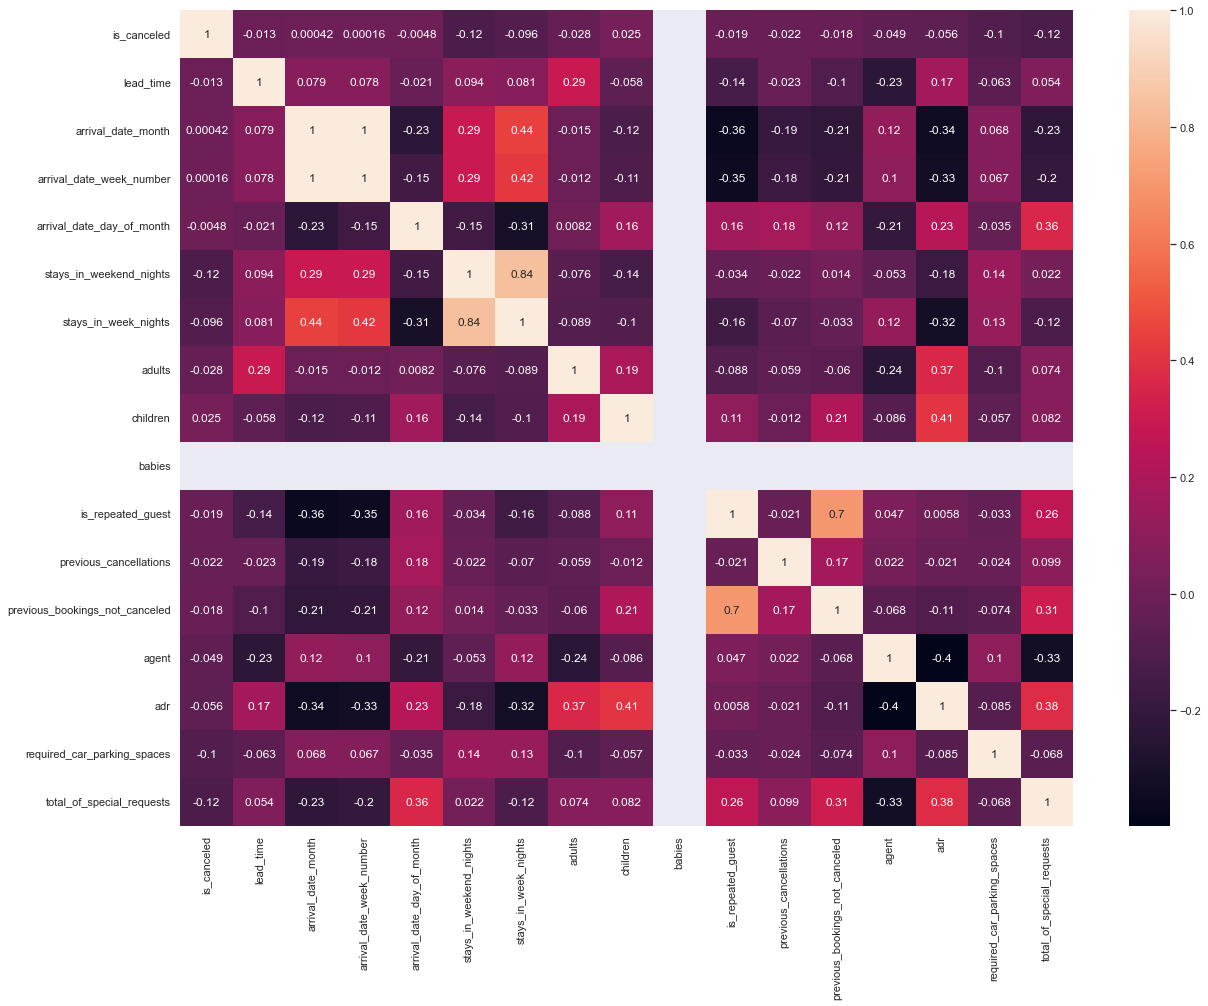

In [471]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [472]:
num_df.var()

lead_time                          2580.337442
arrival_date_month                    9.565744
arrival_date_week_number            177.365248
arrival_date_day_of_month            59.841495
stays_in_weekend_nights               2.194416
stays_in_week_nights                 12.435157
adults                                0.277327
children                              0.062029
babies                                0.000000
is_repeated_guest                     0.073455
previous_cancellations                0.021164
previous_bookings_not_canceled        0.588202
agent                             12035.809580
adr                                1614.955278
required_car_parking_spaces           0.090904
total_of_special_requests             0.333333
dtype: float64

# Variance is very high in some columns, so i rescale them.

In [473]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [474]:
num_df.var()

lead_time                          1.543427
arrival_date_month                 9.565744
arrival_date_week_number           0.414440
arrival_date_day_of_month          0.433097
stays_in_weekend_nights            2.194416
stays_in_week_nights              12.435157
adults                             0.277327
children                           0.062029
babies                             0.000000
is_repeated_guest                  0.073455
previous_cancellations             0.021164
previous_bookings_not_canceled     0.588202
agent                              1.278573
adr                                0.481409
required_car_parking_spaces        0.090904
total_of_special_requests          0.333333
dtype: float64

# Building Machine Learning Models

In [475]:
# Import libraries to built models

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [476]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [477]:
#Splitting data into training set and test set
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=50)

In [478]:
#Logistic Regression
lrm = LogisticRegression(solver='liblinear')
lrm.fit(X_train, y_train)

y_pred_lrm = lrm.predict(X_test)

acc_lrm = accuracy_score(y_test, y_pred_lrm)
confmx = confusion_matrix(y_test, y_pred_lrm)
clf_report = classification_report(y_test, y_pred_lrm)

print(confmx)
print(f"Accuracy Score of LogisticRegression is : {acc_lrm}")

[[54  0]
 [ 3  0]]
Accuracy Score of LogisticRegression is : 0.9473684210526315


C:\Users\Ms. Shekha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ms. Shekha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ms. Shekha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


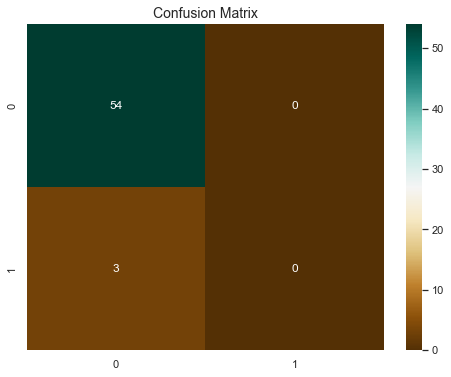

In [479]:
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=14)
sns.heatmap(confmx,annot=True ,cmap='BrBG');

In [480]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       0.00      0.00      0.00         3

    accuracy                           0.95        57
   macro avg       0.47      0.50      0.49        57
weighted avg       0.90      0.95      0.92        57



In [481]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
confmx = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(confmx)
print(f"Accuracy Score of Decision Tree is : {acc_dtc}")

[[49  5]
 [ 2  1]]
Accuracy Score of Decision Tree is : 0.8771929824561403


<AxesSubplot:title={'center':'Confusion Matrix'}>

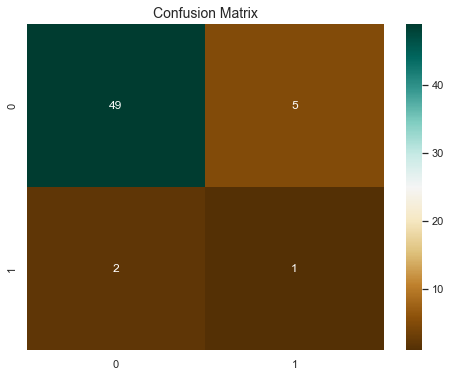

In [482]:
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=14)
sns.heatmap(confmx,annot=True ,cmap='BrBG')

In [483]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.17      0.33      0.22         3

    accuracy                           0.88        57
   macro avg       0.56      0.62      0.58        57
weighted avg       0.92      0.88      0.90        57



In [484]:
# Random Forest Classifier
rdm = RandomForestClassifier()
rdm.fit(X_train, y_train)

y_pred_rdm = rdm.predict(X_test)

acc_rdm = accuracy_score(y_test, y_pred_rdm)
confmx = confusion_matrix(y_test, y_pred_rdm)
clf_report = classification_report(y_test, y_pred_rdm)

print(confmx)
print(f"Accuracy Score of Random Forest is : {acc_rdm}")

[[54  0]
 [ 2  1]]
Accuracy Score of Random Forest is : 0.9649122807017544


<AxesSubplot:title={'center':'Confusion Matrix'}>

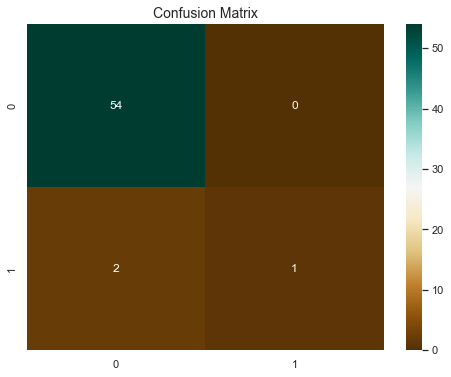

In [485]:
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=14)
sns.heatmap(confmx,annot=True, cmap='BrBG')

In [486]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.33      0.50         3

    accuracy                           0.96        57
   macro avg       0.98      0.67      0.74        57
weighted avg       0.97      0.96      0.96        57



# The best Model to predict the target is the Random Forest Classifier with simple train and test techniques with 96% on the test .

In [487]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [acc_lrm,acc_dtc, acc_rdm]
})


models.sort_values(by ='Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.964912
0,Logistic Regression,0.947368
1,Decision Tree Classifier,0.877193


<AxesSubplot:>

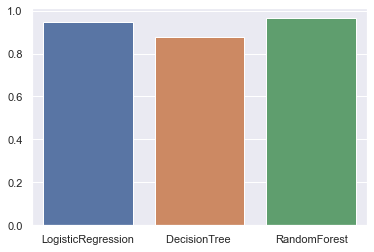

In [488]:
# visulize the accurecy comparse between models
sns.barplot(x=['LogisticRegression', 'DecisionTree ', 'RandomForest'],y=[acc_lrm,acc_dtc, acc_rdm])